In [9]:
import pandas as pd
import numpy as np
import matplotlib as mat
import matplotlib.pyplot as plt
import colorsys
import seaborn as sns

In [ ]:
df = pd.read_csv("costofliving.csv", sep = ',')

In [ ]:
df.shape

In [ ]:
df.head(50)

In [ ]:
#Checando se há valores nulos
df.isnull().sum()

In [ ]:
#Numerando a coluna Rank
listrank = list(range(1,579))

In [ ]:
listrank

In [ ]:
df['Rank'] = listrank

In [ ]:
#Separando país da cidade e criando a coluna country
df[['City2', 'Country', 'Nada']] = df['City'].str.split(',', expand=True)

In [ ]:
df

In [ ]:
#Ao separar as colunas, criou três. Nomeei como nada e removi
del df['Nada']

In [ ]:
df.head(100)

In [ ]:
#Reordenando a ordem das colunas e apagando a coluna City, que continha cidade e país
df = df.reindex(columns=['Rank','City2', 'Country','City','Cost of Living Index','Rent Index',
                         'Cost of Living Plus Rent Index','Groceries Index', 'Restaurant Price Index'])
del df['City']


In [ ]:
#renomeando coluna
df = df.rename(columns={'City2': 'City'})
df

In [ ]:
#Cidades dos Estados Unidos estão com a sigla dos estados e não com o nome do país. Correção
df.loc[df['Country'].isin( [' AL', ' AK', ' AZ', ' AR', ' CA', ' CO', ' CT', ' DE', ' FL', ' GA',
                            ' HI', ' ID', ' IL', ' IN', ' IA', ' KS', ' KY', ' LA', ' ME', ' MD',
                            ' MA', ' MI', ' MN', ' MS', ' MO', ' MT', ' NE', ' NV', ' NH', ' NJ',
                            ' NM', ' NY', ' NC', ' ND', ' OH', ' OK', ' OR', ' PA', ' RI', ' SC',
                            ' SD', ' TN', ' TX', ' UT', ' VT', ' VA', ' WA', ' WV', ' WI', ' WY']), 'Country'] = 'United States'

In [ ]:
df

In [ ]:
df.head(50)

In [ ]:
#após tratamento de dados, df salvo em novo arquivo csv
df.to_csv(r'C:\Users\vilia\Desktop\datasets\costofliving2.csv', index=False)

In [2]:
df = pd.read_csv("costofliving2.csv", sep = ',')
df

,Rank,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index
0,1,Hamilton,Bermuda,149.02,96.10,124.22,157.89,155.22
1,2,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52
2,3,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95
3,4,Zug,Switzerland,128.13,72.12,101.87,132.61,130.93
4,5,Lugano,Switzerland,123.99,44.99,86.96,129.17,119.80
...,...,...,...,...,...,...,...,...
573,574,Kanpur,India,20.79,3.60,12.73,22.19,13.31
574,575,Karachi,Pakistan,20.75,4.84,13.29,18.48,15.21
575,576,Rawalpindi,Pakistan,20.52,4.78,13.14,18.51,16.18
576,577,Multan,Pakistan,18.68,2.94,11.30,18.37,11.80


In [4]:
#Histograma por país, no top 50 de cidades mais caras
top50 = df.head(50)
top50

,Rank,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index
0,1,Hamilton,Bermuda,149.02,96.10,124.22,157.89,155.22
1,2,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52
2,3,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95
3,4,Zug,Switzerland,128.13,72.12,101.87,132.61,130.93
4,5,Lugano,Switzerland,123.99,44.99,86.96,129.17,119.80
5,6,Lausanne,Switzerland,122.03,59.55,92.74,122.56,127.01
6,7,Beirut,Lebanon,120.47,27.76,77.01,141.33,116.95
7,8,Bern,Switzerland,118.16,46.12,84.39,118.37,120.88
8,9,Geneva,Switzerland,114.05,75.05,95.77,112.70,126.31
9,10,Stavanger,Norway,104.61,35.38,72.16,102.46,107.51


Text(0.5, 0, 'Países')

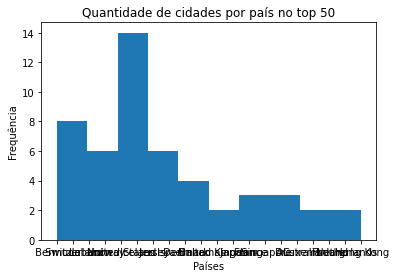

In [6]:
#Quantidade de cidades por país no top 50
plt.hist(top50['Country'])
plt.title('Quantidade de cidades por país no top 50')
plt.ylabel('Frequência')
plt.xlabel('Países')

In [7]:
top20 = df.head(20)
top20

,Rank,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index
0,1,Hamilton,Bermuda,149.02,96.10,124.22,157.89,155.22
1,2,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52
2,3,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95
3,4,Zug,Switzerland,128.13,72.12,101.87,132.61,130.93
4,5,Lugano,Switzerland,123.99,44.99,86.96,129.17,119.80
5,6,Lausanne,Switzerland,122.03,59.55,92.74,122.56,127.01
6,7,Beirut,Lebanon,120.47,27.76,77.01,141.33,116.95
7,8,Bern,Switzerland,118.16,46.12,84.39,118.37,120.88
8,9,Geneva,Switzerland,114.05,75.05,95.77,112.70,126.31
9,10,Stavanger,Norway,104.61,35.38,72.16,102.46,107.51


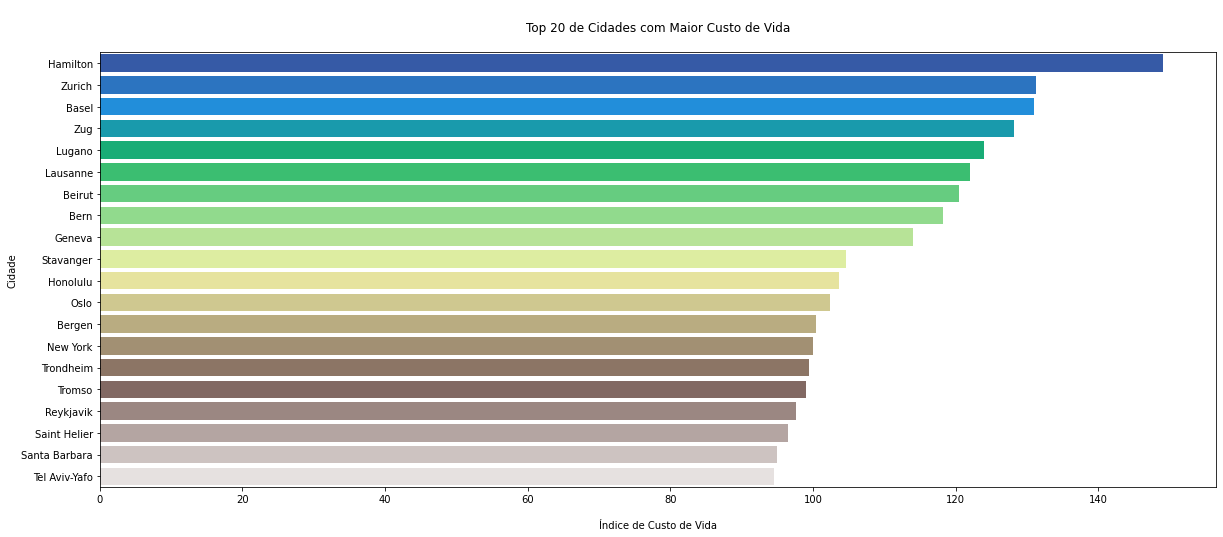

In [10]:
# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = top20['City'], x = top20['Cost of Living Index'], orient = "h", palette = "terrain")

plt.ylabel('Cidade')             
plt.xlabel('\nÍndice de Custo de Vida')
plt.title('\nTop 20 de Cidades com Maior Custo de Vida\n')
plt.show()

In [11]:
#ranking de cidades com aluguel mais caro
Top20Aluguel = df.sort_values(by=['Cost of Living Plus Rent Index'], ascending=False).head(20)
Top20Aluguel

,Rank,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index
0,1,Hamilton,Bermuda,149.02,96.10,124.22,157.89,155.22
1,2,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52
3,4,Zug,Switzerland,128.13,72.12,101.87,132.61,130.93
21,22,San Francisco,United States,93.91,108.42,100.72,97.05,93.40
13,14,New York,United States,100.00,100.00,100.00,100.00,100.00
8,9,Geneva,Switzerland,114.05,75.05,95.77,112.70,126.31
5,6,Lausanne,Switzerland,122.03,59.55,92.74,122.56,127.01
2,3,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95
20,21,Berkeley,United States,94.36,88.22,91.48,106.23,78.85
22,23,Oakland,United States,92.93,87.79,90.52,98.46,78.71


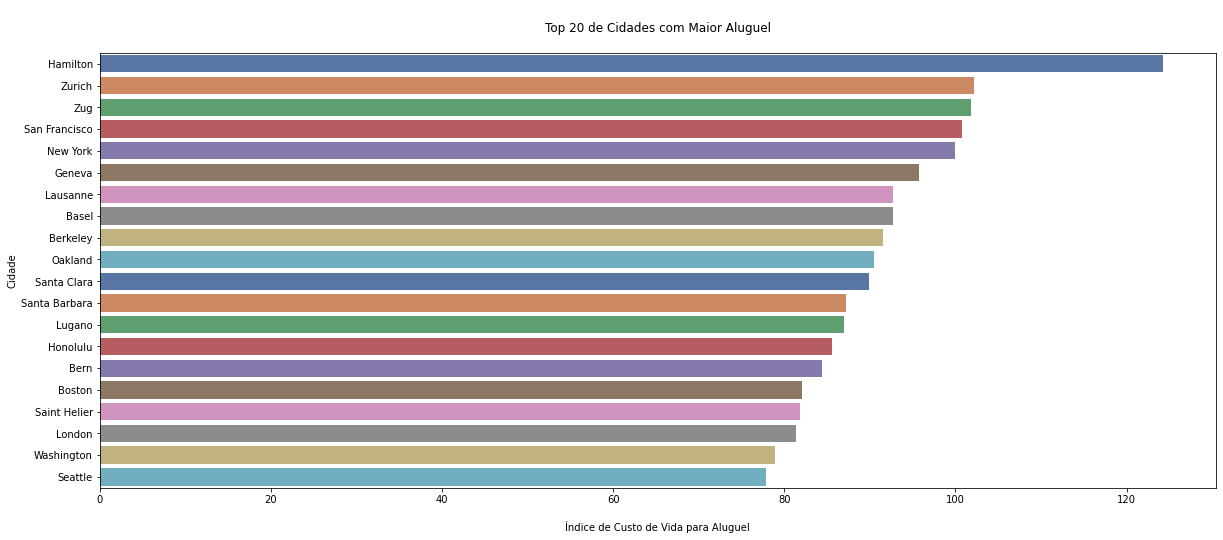

In [14]:
# Figura
plt.figure(figsize = (20,8))

# Barplot
sns.barplot(y = Top20Aluguel['City'], x = Top20Aluguel['Cost of Living Plus Rent Index'], orient = "h", palette = "deep")

plt.ylabel('Cidade')             
plt.xlabel('\nÍndice de Custo de Vida para Aluguel')
plt.title('\nTop 20 de Cidades com Maior Aluguel\n')
plt.show()

In [16]:
#separando cidades dos eua
cidadeseua = df.loc[df['Country'] ==  'United States']
cidadeseua

,Rank,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index
10,11,Honolulu,United States,103.65,65.07,85.56,114.92,94.28
13,14,New York,United States,100.00,100.00,100.00,100.00,100.00
18,19,Santa Barbara,United States,95.01,78.42,87.23,99.53,99.41
20,21,Berkeley,United States,94.36,88.22,91.48,106.23,78.85
21,22,San Francisco,United States,93.91,108.42,100.72,97.05,93.40
...,...,...,...,...,...,...,...,...
291,292,Memphis,United States,62.29,34.91,49.45,58.08,69.54
293,294,Akron,United States,62.20,22.90,43.78,63.55,55.56
299,300,Little Rock,United States,59.26,25.60,43.48,57.28,64.63
304,305,Wichita,United States,58.92,24.26,42.67,53.08,57.42


In [17]:
#Top 10 cidade dos eua com alugueis mais caros
cidadeseua = cidadeseua.sort_values(by=['Cost of Living Plus Rent Index'], ascending=False).head(10)
cidadeseua

,Rank,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index
21,22,San Francisco,United States,93.91,108.42,100.72,97.05,93.40
13,14,New York,United States,100.00,100.00,100.00,100.00,100.00
20,21,Berkeley,United States,94.36,88.22,91.48,106.23,78.85
22,23,Oakland,United States,92.93,87.79,90.52,98.46,78.71
24,25,Santa Clara,United States,89.41,90.39,89.87,100.63,73.46
18,19,Santa Barbara,United States,95.01,78.42,87.23,99.53,99.41
10,11,Honolulu,United States,103.65,65.07,85.56,114.92,94.28
35,36,Boston,United States,85.47,78.26,82.09,85.40,90.86
27,28,Seattle,United States,88.52,65.84,77.89,87.34,93.09
130,131,San Jose,United States,73.71,82.30,77.74,70.53,74.25


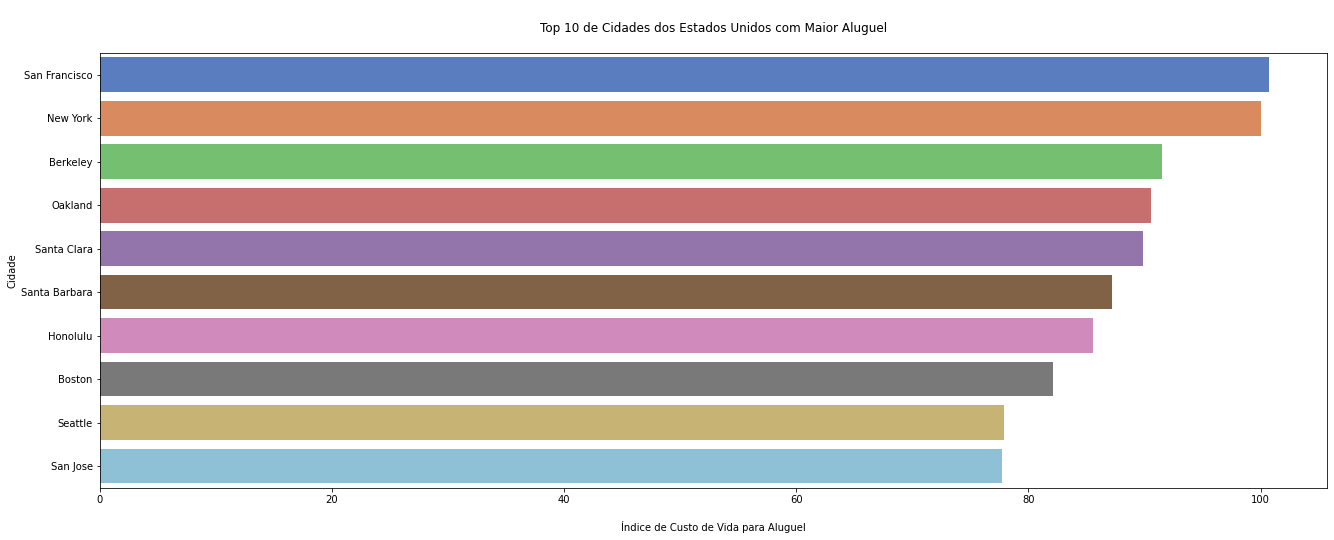

In [23]:
plt.figure(figsize = (22,8))

# Barplot
sns.barplot(y = cidadeseua['City'], x = cidadeseua['Cost of Living Plus Rent Index'], orient = "h", palette = "muted")

plt.ylabel('Cidade')             
plt.xlabel('\nÍndice de Custo de Vida para Aluguel')
plt.title('\nTop 10 de Cidades dos Estados Unidos com Maior Aluguel\n')
plt.show()

In [29]:
df

,Rank,City,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index
0,1,Hamilton,Bermuda,149.02,96.10,124.22,157.89,155.22
1,2,Zurich,Switzerland,131.24,69.26,102.19,136.14,132.52
2,3,Basel,Switzerland,130.93,49.38,92.70,137.07,130.95
3,4,Zug,Switzerland,128.13,72.12,101.87,132.61,130.93
4,5,Lugano,Switzerland,123.99,44.99,86.96,129.17,119.80
...,...,...,...,...,...,...,...,...
573,574,Kanpur,India,20.79,3.60,12.73,22.19,13.31
574,575,Karachi,Pakistan,20.75,4.84,13.29,18.48,15.21
575,576,Rawalpindi,Pakistan,20.52,4.78,13.14,18.51,16.18
576,577,Multan,Pakistan,18.68,2.94,11.30,18.37,11.80
